In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [2]:
data = pd.read_csv("HY_Universe_corporate_bond.csv",header=0)

In [3]:
data.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [4]:
##2.1

print("Num of rows: " + str(data.shape[0]))
print("Num of columns: " + str(data.shape[1]))

Num of rows: 2721
Num of columns: 37


In [5]:
##2.2
#Determine whether variable is numerical or categorical
data.dtypes

CUSIP                          object
Ticker                         object
Issue Date                     object
Maturity                       object
1st Call Date                  object
Moodys                         object
S_and_P                        object
Fitch                          object
Bloomberg Composite Rating     object
Coupon                        float64
Issued Amount                 float64
Maturity Type                  object
Coupon Type                    object
Maturity At Issue months      float64
Industry                       object
LiquidityScore                float64
Months in JNK                  object
Months in HYG                  object
Months in Both                 object
IN_ETF                         object
LIQ SCORE                     float64
n_trades                        int64
volume_trades                 float64
total_median_size             float64
total_mean_size               float64
n_days_trade                    int64
days_diff_ma

In [6]:
##2.3 
#calculate the means, standard deviations and percentiles of numerical variables
print(data.describe(percentiles=[0.25, 0.5,0.75]))

            Coupon  Issued Amount  Maturity At Issue months  LiquidityScore  \
count  2721.000000   2.721000e+03               2721.000000     2721.000000   
mean     10.307872   8.299295e+08                113.968997       18.218230   
std      63.051382   5.802790e+08                101.893176        7.872071   
min       0.000000   3.700000e+08                 11.930000        4.388758   
25%       5.000000   5.000000e+08                 65.170000       12.738630   
50%       6.250000   6.500000e+08                 97.370000       16.538471   
75%       7.750000   1.000000e+09                121.770000       22.120108   
max     999.000000   7.364026e+09               1217.570000       54.673908   

         LIQ SCORE      n_trades  volume_trades  total_median_size  \
count  2721.000000   2721.000000   2.721000e+03       2.721000e+03   
mean      0.182182   2700.696435   7.222372e+08       5.361476e+05   
std       0.078721   5572.262205   1.027825e+09       4.193546e+05   
min     

In [7]:
data['Industry']

0                    Real Estate
1                          Banks
2       Household Products/Wares
3       Household Products/Wares
4       Household Products/Wares
                  ...           
2716                    Electric
2717                    Electric
2718                       Media
2719                    Electric
2720                    Electric
Name: Industry, Length: 2721, dtype: object

In [8]:
# Counts for categorical data
Coupon_Type = data['Coupon Type']

In [9]:
Coupon_Type

0       PAY-IN-KIND
1             FIXED
2             FIXED
3             FIXED
4             FIXED
           ...     
2716          FIXED
2717          FIXED
2718          FIXED
2719      EXCHANGED
2720          FIXED
Name: Coupon Type, Length: 2721, dtype: object

In [10]:
unique = set(Coupon_Type)
sys.stdout.write("Unique Label Values \n")
print(unique) 

Unique Label Values 
{'FIXED', 'FLAT TRADING', 'ZERO COUPON', 'STEP CPN', 'PAY-IN-KIND', 'DEFAULTED', 'VARIABLE', 'FLOATING', 'EXCHANGED', 'FUNGED'}


In [11]:
count = {}
freq = []
for i in Coupon_Type:
    if i in count:
        count[i] = count[i]+1
    else:
        count[i] = 1   

In [12]:
sys.stdout.write("\nCounts for Each Value of Categorical Label \n")
print(count)


Counts for Each Value of Categorical Label 
{'PAY-IN-KIND': 41, 'FIXED': 2139, 'VARIABLE': 111, 'FLOATING': 124, 'EXCHANGED': 102, 'DEFAULTED': 184, 'FLAT TRADING': 7, 'ZERO COUPON': 7, 'STEP CPN': 4, 'FUNGED': 2}


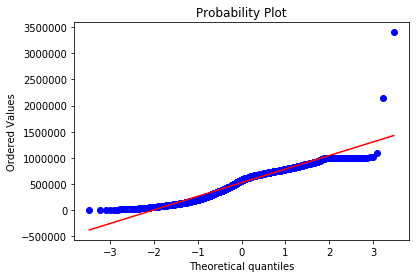

In [13]:
##2.4
total_mean_size = data['total_mean_size']
from scipy import stats
stats.probplot(total_mean_size, dist="norm", plot=plt)
plt.show()

In [14]:
import numpy as np
import pylab
import scipy.stats as stats

In [15]:
##2.5 Using pandas to summarize data
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plot

In [16]:
print(data.head())
print(data.tail())
print(data.describe())

       CUSIP  Ticker  Issue Date    Maturity 1st Call Date Moodys S_and_P  \
0  000324AA1  FLECIN    7/1/2014    7/1/2019    10/23/2017    Nan     Nan   
1  00080QAB1     RBS   3/15/2004    6/4/2018           Nan    Ba1     BB+   
2  00081TAD0    ACCO   5/14/2010   3/15/2015           Nan     WR      NR   
3  00081TAH1    ACCO   6/17/2013   4/30/2020           Nan     WR      NR   
4  00081TAJ7    ACCO  12/22/2016  12/15/2024    12/15/2019     B1     BB-   

  Fitch Bloomberg Composite Rating  Coupon  ...  percent_intra_dealer  \
0   Nan                        Nan   12.00  ...              0.006645   
1   BBB                        BB+    4.65  ...              0.425018   
2   BB+                         NR   10.63  ...              0.115207   
3    WD                         NR    6.75  ...              0.426332   
4    BB                        BB-    5.25  ...              0.157216   

  percent_uncapped bond_type  Client_Trade_Percentage weekly_mean_volume  \
0         0.292359    

In [17]:
#2.6
from pandas.plotting import parallel_coordinates

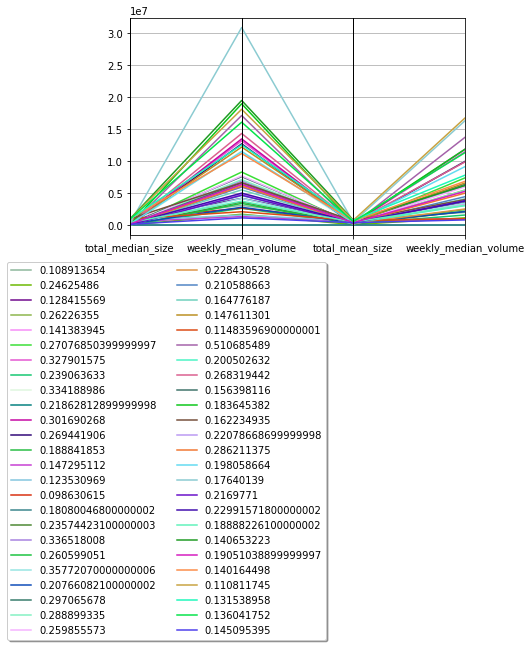

In [18]:
data1 = data[['LIQ SCORE','total_median_size','weekly_mean_volume','total_mean_size','weekly_median_volume']][:50]
parallel_coordinates(data1, 'LIQ SCORE')
plt.legend(loc = 'upper right', bbox_to_anchor = (0.6,-0.1),  ncol = 2, fancybox = True, shadow = True)
plt.show()


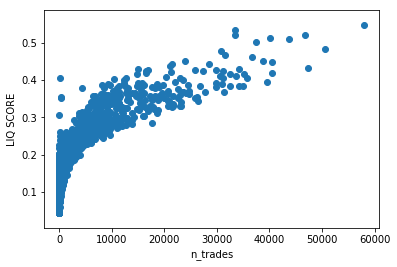

In [19]:
# ##2.7
plt.scatter(data['n_trades'], data['LIQ SCORE'])
plt.xlabel('n_trades')
plt.ylabel('LIQ SCORE')
plt.show()

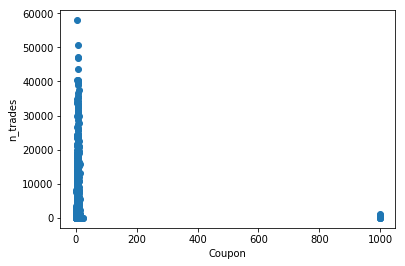

In [20]:
##2.8
Coupon = data['Coupon']
n_trades = data['n_trades']

plt.xlabel('Coupon')
plt.ylabel('n_trades')
plt.scatter(Coupon, n_trades)
plt.show()

In [21]:
##2.9
sys.stdout.write("Correlation between LIQ SCORE and total_median_size \n")
np.corrcoef(data['LIQ SCORE'], data['total_median_size'])[0, 1]

Correlation between LIQ SCORE and total_median_size 


-0.6270081163367017

In [22]:
##2.10

corMat = pd.DataFrame(data.corr())
corMat

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
Coupon,1.000000,-0.014238,0.098844,-0.042302,-0.042302,-0.023330,-0.026717,0.044601,0.026891,-0.028336,...,-0.014316,-0.045897,0.051856,0.029125,-0.027724,-0.028584,-0.026362,-0.014438,-0.028045,-0.018326
Issued Amount,-0.014238,1.000000,0.008601,0.134930,0.134930,0.156948,0.326310,0.062343,0.078362,0.068113,...,0.052617,-0.112369,-0.070714,-0.049513,0.382050,0.396947,0.261469,0.105208,0.274420,0.188765
Maturity At Issue months,0.098844,0.008601,1.000000,0.072507,0.072507,0.038839,-0.015227,-0.115086,-0.138581,0.029530,...,0.104127,0.100168,0.102990,-0.040186,-0.023002,-0.032868,-0.017137,-0.020392,0.036729,0.006573
LiquidityScore,-0.042302,0.134930,0.072507,1.000000,1.000000,0.803139,0.786718,-0.627008,-0.656980,0.873040,...,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.025707,0.673569,0.239951
LIQ SCORE,-0.042302,0.134930,0.072507,1.000000,1.000000,0.803139,0.786718,-0.627008,-0.656980,0.873040,...,0.671903,0.666321,-0.368492,-0.496127,0.385978,0.371213,0.481142,0.025707,0.673569,0.239951
n_trades,-0.023330,0.156948,0.038839,0.803139,0.803139,1.000000,0.769322,-0.425801,-0.468673,0.704310,...,0.415695,0.396880,-0.208283,-0.348408,0.309053,0.285998,0.432955,-0.041335,0.804753,0.234165
volume_trades,-0.026717,0.326310,-0.015227,0.786718,0.786718,0.769322,1.000000,-0.276204,-0.278564,0.772564,...,0.387555,0.241814,-0.452584,-0.327922,0.503159,0.479018,0.616802,-0.037198,0.602055,0.144272
total_median_size,0.044601,0.062343,-0.115086,-0.627008,-0.627008,-0.425801,-0.276204,1.000000,0.930213,-0.490428,...,-0.650101,-0.826443,0.081332,0.486900,0.060608,0.053381,-0.066253,0.138658,-0.378970,-0.096283
total_mean_size,0.026891,0.078362,-0.138581,-0.656980,-0.656980,-0.468673,-0.278564,0.930213,1.000000,-0.494483,...,-0.679317,-0.862401,0.086759,0.502385,0.052018,0.054723,-0.087748,0.177104,-0.428501,-0.100327
n_days_trade,-0.028336,0.068113,0.029530,0.873040,0.873040,0.704310,0.772564,-0.490428,-0.494483,1.000000,...,0.500944,0.433119,-0.444068,-0.406258,0.168114,0.169430,0.323094,-0.118874,0.416313,0.026527


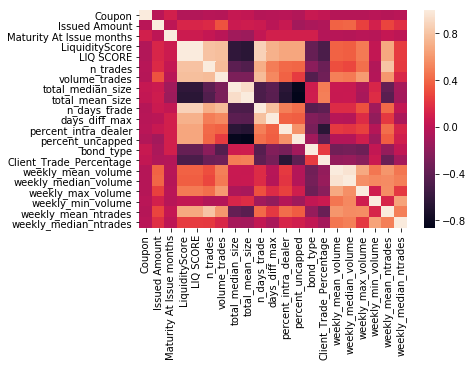

In [23]:
sns.heatmap(corMat)

In [24]:
print("My name is {Zhuoyuan Zhang}")
print("My NetID is: {zz10}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Zhuoyuan Zhang}
My NetID is: {zz10}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
